In [33]:
import pandas as pd
import numpy as np

#визуализация
import matplotlib.pyplot as plt
import seaborn as sns
import osmnx as ox
%matplotlib inline
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [34]:
df = pd.read_csv('support/transactions.csv')
df['date'] = pd.to_datetime(df['date'])
df.head(3)

,ration,address,start,finish,date,month,day,dow,street,area,short_address,location,latitude,longitude,weather,price,month_str,period,id,time_zone
0,750,"Екатеринбург, ул Вилонова, 22 , кв. 77, эт. 10...",7,9,2022-01-02,1,2,6,ул Вилонова 22,Екатеринбург,"Екатеринбург, ул Вилонова 22","[56.864781199999996, 60.64482563954775]",56.864781,60.644826,-5,550,Январь,0.0,s36926,2
1,1500,"Екатеринбург, ул Михеева М.Н., 2 , кв. 793, эт...",6,8,2022-01-02,1,2,6,ул Михеева М.Н. 2,Екатеринбург,"Екатеринбург, ул Михеева М.Н. 2","[56.7805477, 60.5514291]",56.780548,60.551429,-5,650,Январь,0.0,j46568,1
2,1500,"Предельная улица, 15, посёлок Совхозный, муниц...",6,8,2022-01-02,1,2,6,Предельная ул 15,Екатеринбург,"Екатеринбург, Предельная ул 15","[56.7631478, 60.5691115]",56.763148,60.569111,-5,650,Январь,0.0,j77513,1


___

In [35]:
uniq_clients = df['address'].nunique()
fav_clients = df['address'].value_counts()[:200].index

count_fav_clients = 0
total = df['price'].sum()

for client in fav_clients:
    count_fav_clients += df[df['address'] == client]['price'].sum()
print(f'Прибыль за год от 200 наиболее лояльных клиентов: {count_fav_clients} Р')

Прибыль за год от 200 наиболее лояльных клиентов: 14402690 Р


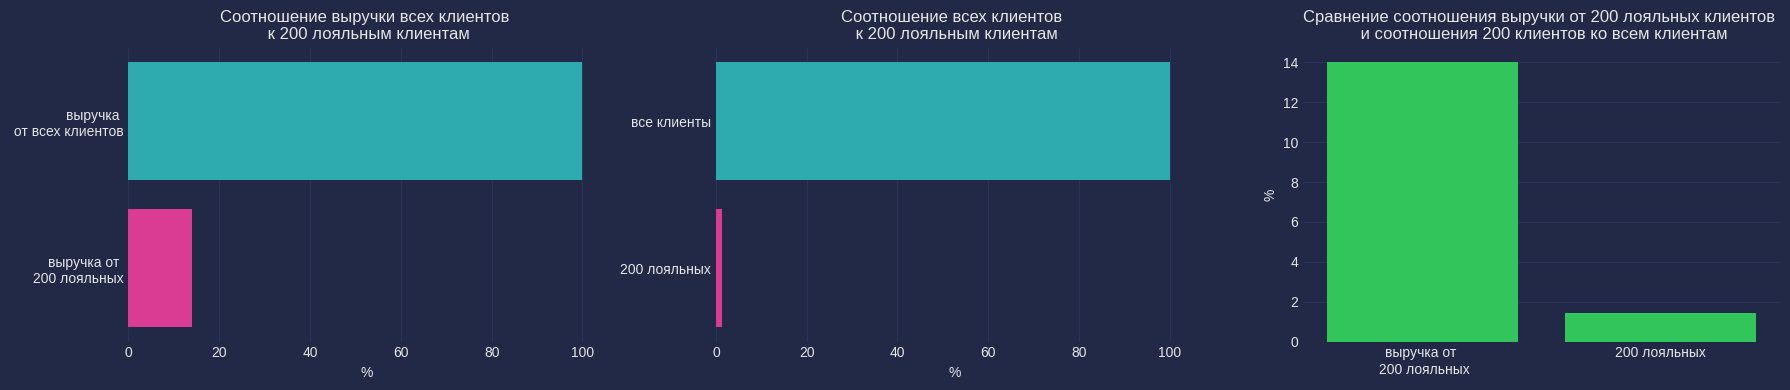

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

bar_summary = sns.barplot(y=['выручка \n от всех клиентов', 'выручка от \n 200 лояльных'], x=[100, (count_fav_clients * 100)/total],  ax=axes[0])
bar_clients = sns.barplot(y=['все клиенты', '200 лояльных'], x=[100, (200 * 100)/uniq_clients], ax=axes[1])
bar_ration = sns.barplot(x=['выручка от \n 200 лояльных', '200 лояльных'], y=[(count_fav_clients * 100)/total, (200 * 100)/uniq_clients], color='#18de50', ax=axes[2])

bar_summary.set(title='Соотношение выручки всех клиентов \n к 200 лояльным клиентам', xlabel='%')
bar_clients.set(title='Соотношение всех клиентов \n к 200 лояльным клиентам', xlabel='%')
bar_ration.set(title='Сравнение соотношения выручки от 200 лояльных клиентов \n и соотношения 200 клиентов ко всем клиентам', ylabel='%')
plt.tight_layout();

**По графикам видно, что благодаря 200 лучшим клиентам доля выручки занимает 14%. Это весомый вклад в прибыль компании.**

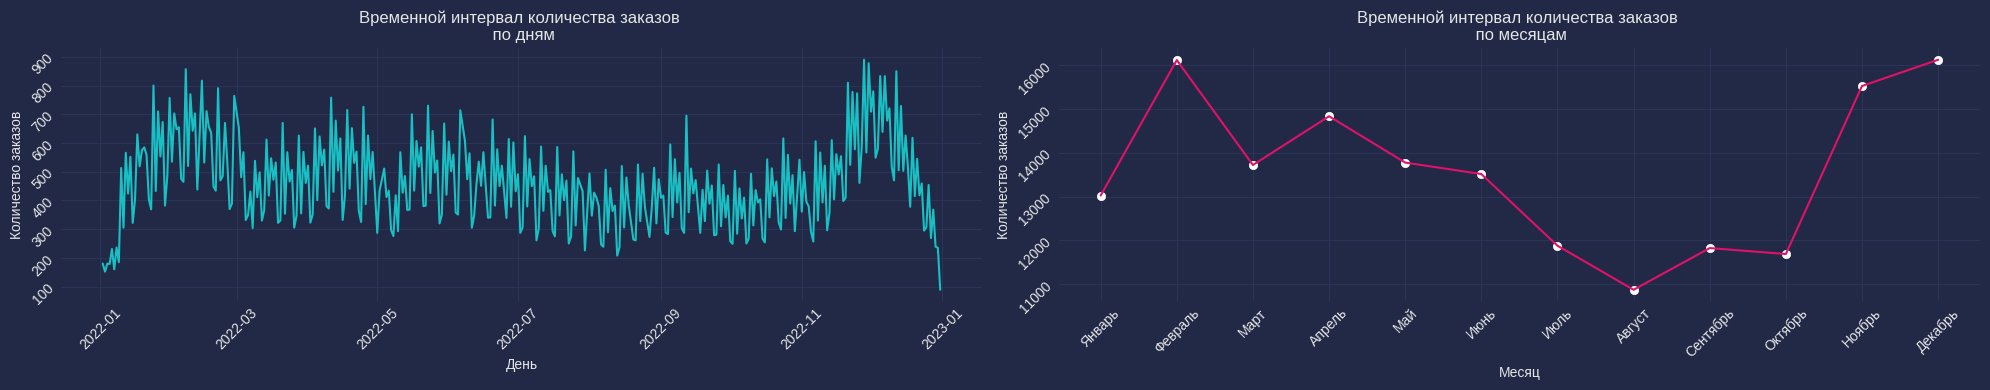

In [37]:
time_val = df.groupby('date', as_index=False)['ration'].count()# группировка количества заказов по дням
time_val_month = df.groupby(['month', 'month_str'], as_index=False)['ration'].count()# группировка количества заказов по месяцам

# Строим графики зависимости количества заказов от дня/месяца
#------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

days = sns.lineplot(x=time_val.date, y=time_val.ration, ax=axes[0])

months = sns.lineplot(x=time_val_month.month_str, y=time_val_month.ration, color='#e01268' ,ax=axes[1])
scater = sns.scatterplot(x=time_val_month.month_str, y=time_val_month.ration, ax=axes[1], color='#fff')

days.xaxis.set_tick_params(rotation=45)
days.yaxis.set_tick_params(rotation=45)
months.xaxis.set_tick_params(rotation=45)
months.yaxis.set_tick_params(rotation=45)

days.set(title='Временной интервал количества заказов \n по дням', xlabel='День', ylabel='Количество заказов')
months.set(title='Временной интервал количества заказов \n по месяцам', xlabel='Месяц', ylabel='Количество заказов')
plt.tight_layout();

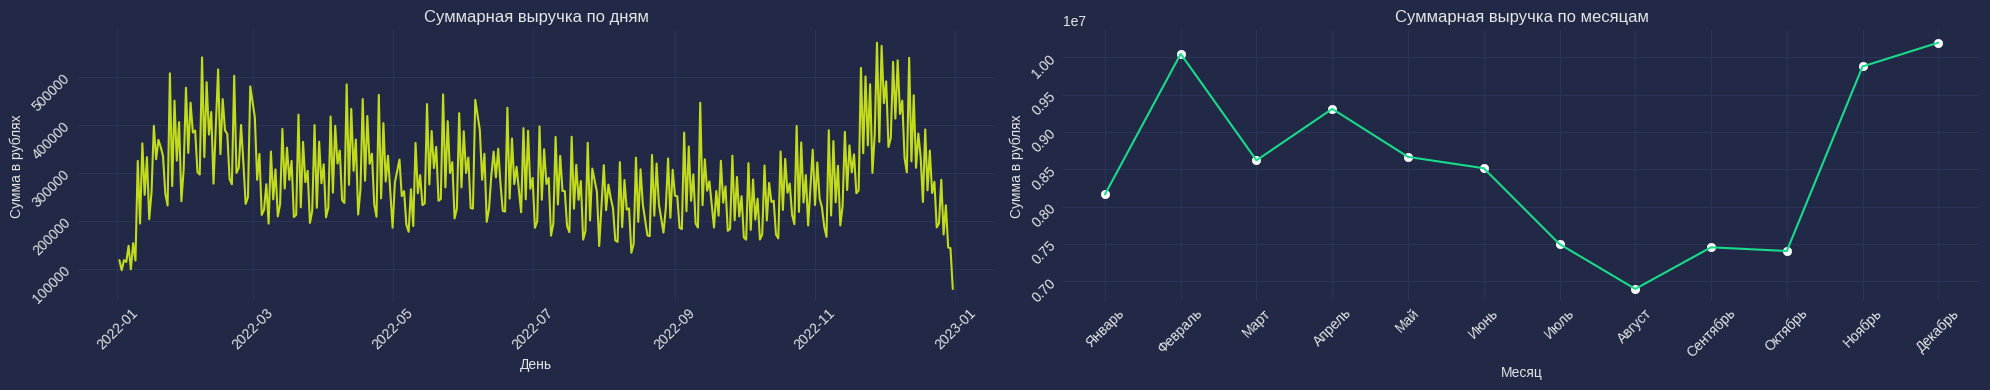

In [38]:
price_val = df.groupby('date', as_index=False)['price'].sum()# группировка суммарной выручки по дням
price_val_month = df.groupby(['month', 'month_str'], as_index=False)['price'].sum()# группировка суммарной выручки по месяцам

# Строим графики зависимости суммарной выручки от дня/месяца
#------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

days = sns.lineplot(x=price_val.date, y=price_val.price, color='#c2db1a', ax=axes[0])

months = sns.lineplot(x=price_val_month.month_str, y=price_val_month.price, color='#1adb8b' ,ax=axes[1])
scater = sns.scatterplot(x=price_val_month.month_str, y=price_val_month.price, ax=axes[1], color='#fff')

days.xaxis.set_tick_params(rotation=45)
days.yaxis.set_tick_params(rotation=45)
months.xaxis.set_tick_params(rotation=45)
months.yaxis.set_tick_params(rotation=45)

days.set(title='Суммарная выручка по дням', xlabel='День', ylabel='Сумма в рублях')
months.set(title='Суммарная выручка по месяцам', xlabel='Месяц', ylabel='Сумма в рублях')
plt.tight_layout();

**По этим двум графикам видно, что большинство заказов приходит на ноябрь, декабрь, фераль.** 

**Большая просадка просиходит летом. Мне кажется это связано с тем, что люди уезжают в отпуска.**

**Также резкая просадка видна в январе, это связанно с январскими праздниками**

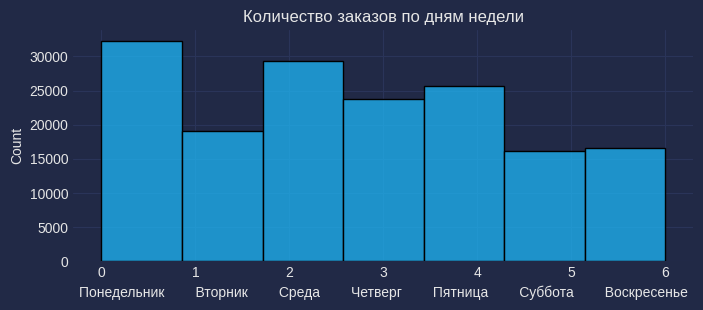

In [39]:
fig = plt.figure(figsize=(8, 3))
hist_dow = sns.histplot(df['dow'], bins=7, color='#1eb6f7')
s= ' '*8
hist_dow.set(
    title='Количество заказов по дням недели',
    xlabel='Понедельник'+s+'Вторник'+s+'Среда'+s+'Четверг'+s+'Пятница'+s+'Суббота'+s+'Воскресенье'
    );

**Видно, что большинство заказов приходится на понедельник, среду и пятницу. Это связанно с тем, что пакет с питанием доставляется на два дня.**

**Люди начинают заказывать программу на понедельник и каждые два дня им привозят продукты**

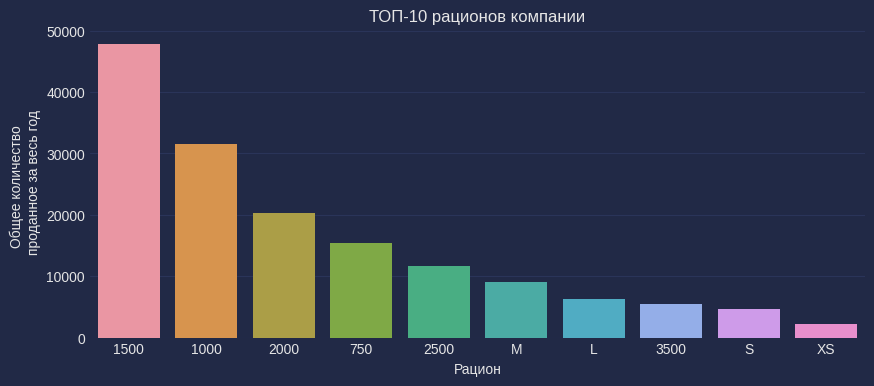

In [40]:
ration = df['ration'].value_counts().sort_values(ascending=False)[:10]
ration = pd.DataFrame({'ration': ration.index, 'count': ration.values})

fig = plt.figure(figsize=(10, 4))

bar = sns.barplot(x=ration['ration'], y=ration['count'])
bar.set(title='ТОП-10 рационов компании', xlabel='Рацион', ylabel='Общее количество \n проданное за весь год');

**По гистограмме видно, что самым популярным рационом являеться рацион на 1500 килокалорий.** 

**Так как в среднем женщинам нужно порядка 2000 килокалорий в сутки, а мужчинам — 2500 килокалорий, то можно предположить, что в основном люди пользуются услугами компании ради похудения**

In [41]:
time_ration = df.groupby('month', as_index=False)['ration'].agg(pd.Series.mode) #группировка типа рациона по месяцам
time_ration

,month,ration
0,1,1500
1,2,1500
2,3,1500
3,4,1500
4,5,1500
5,6,1500
6,7,1500
7,8,1500
8,9,1500
9,10,1500


**Данная таблица еще раз доказывает, что именно рацион на 1500ккал является самым популярным. Так как в каждом месяце преобладает именно этот рацион**

In [42]:
start = df['start'].value_counts().sort_values(ascending=False)[:5]
start = pd.DataFrame({'start': start.index, 'count': start.values})

/tmp/ipykernel_26586/3625466734.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  start = df['start'].value_counts().sort_values(ascending=False)[:5]


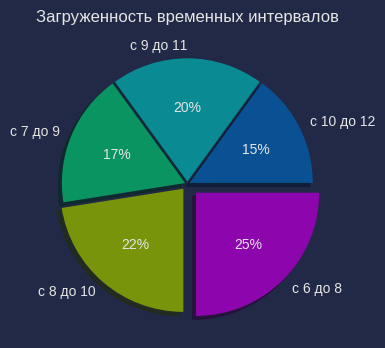

In [43]:
fig, ax = plt.subplots(figsize=(16, 4))
colors = ['#0a5194', '#0a8b94', '#0a9461', '#78940a', '#8c05ad']
labels = [f'с {str(elem)} до {str(elem + 2)}' for elem in start.start.values[::-1]]
explode = [0.02, 0.02, 0.02, 0.05, 0.1]

pie = plt.pie(
    x=start['start'], labels=labels, colors=colors,
    autopct = '%d%%', explode=explode, shadow=True
    )

ax.set(title='Загруженность временных интервалов');

**Большинсвто заказов(четверть) приходиться на интервал с 6 до 8 часов утра. На мой взгляд, это связанно с тем, что средний человек начинает работу с 8 - 10 утра и ему бы хотелось получить свое питание перед работой - иметь готовый завтрак и обед, а не стоять у плиты с самого утра**

In [44]:
def temp_group(deegre):
    if deegre < -15: return 'Заморозки'
    if 0 > deegre >= -15: return 'Холодно'
    if 10 > deegre >= 0: return 'Прохладно'
    if 20 > deegre >= 10: return 'Тепло'
    if deegre >= 20: return 'Жарко'

def get_season(month):
    if month in [12, 1, 2]: return 'Зима'
    if month in [3, 4, 5]: return 'Весна'
    if month in [6, 7, 8]: return 'Лето'
    if month in [9, 10, 11]: return 'Осень'

df_temp = df[['weather', 'ration', 'month']].sort_values(by='weather')
df_temp['weather_group'] = df_temp['weather'].apply(temp_group)
df_temp['season'] = df_temp['month'].apply(get_season)

temp_val = df_temp.groupby('weather_group')['ration'].count().sort_values()
season_val = df_temp.groupby('season')['ration'].count()

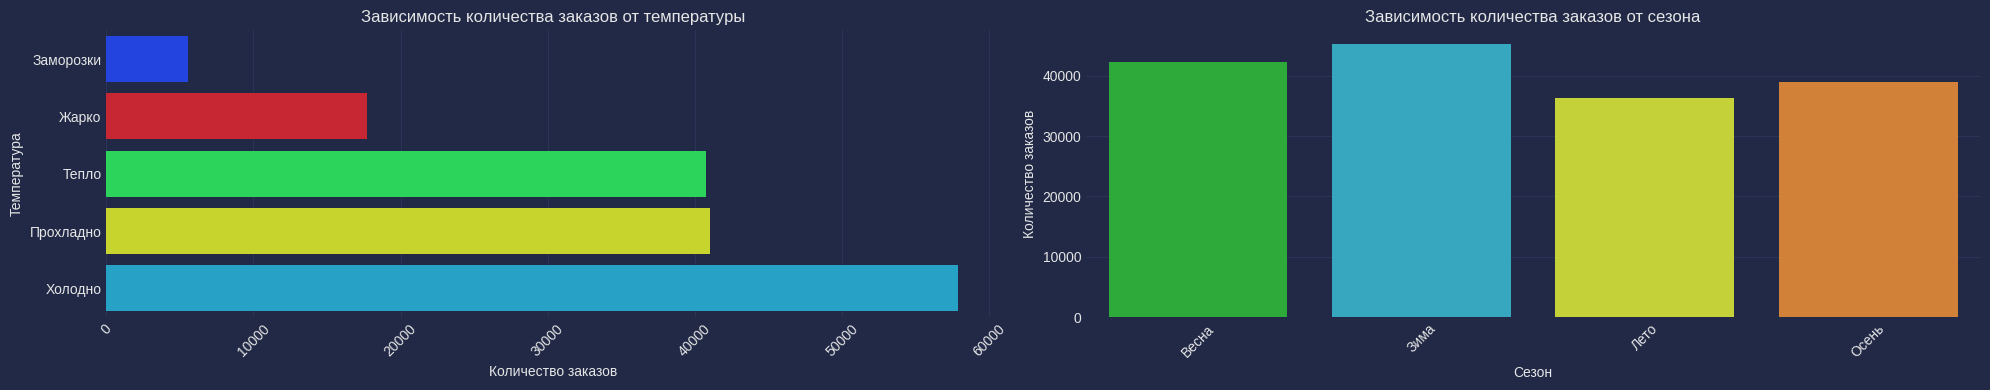

In [45]:
palette_temp = ['#052fff', '#e00d1c', '#11f050', '#ddf011', '#0dafe0']
palette_season= ['#19bf2a', '#20b5d6', '#daeb1e', '#eb811e']


fig, axes = plt.subplots(1, 2, figsize=(20, 4))

bar_temp = sns.barplot(
    x=temp_val.values, y=temp_val.index,
    palette=palette_temp, ax=axes[0]
    )
bar_season = sns.barplot(
    y=season_val.values, x=season_val.index,
    palette=palette_season, ax=axes[1]
    )

bar_temp.xaxis.set_tick_params(rotation=45)
bar_season.xaxis.set_tick_params(rotation=45)

bar_temp.set(
    title='Зависимость количества заказов от температуры',
    xlabel='Количество заказов', ylabel='Температура'
    )
bar_season.set(
    title='Зависимость количества заказов от сезона',
    xlabel='Сезон', ylabel='Количество заказов'
    )
fig.set_tight_layout(tight=True);

**По левому графику можно сделать неверный вывод, что в холодную погоду заказывают чаще, но если посмотреть на правый график то видно, что в сумме по сезонам количество заказов держаться почти на равных уровнях. Также это связанно с летними отпусками, где люди уезжают из города, что мы видели на графиках выше.**

**Посмотрим на распространение адресов**

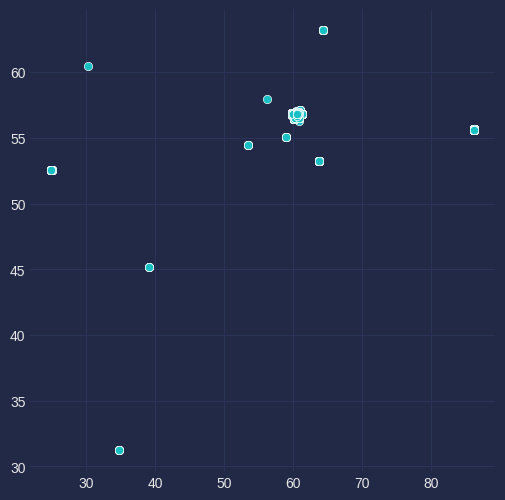

In [46]:
fig = plt.figure(figsize=(6, 6))
scatter = sns.scatterplot(x=df['longitude'], y = df['latitude'])
scatter.set(title='', xlabel='', ylabel='');

**Видно, что присутвуют выбросы геоданных, которые не правильно определила библиотека geopy. Попробуем от них избавиться несколькими способами**

**С помощью IQR и z_score**

In [47]:
def get_clean_df(df: pd.DataFrame, method: str, step=1) -> pd.DataFrame:
    """ Функция очищает датасэт от геолокационных выбросов

    Args:
        df (pd.DataFrame): датасют с выбросами
        method (str): выбор метода удаления выбросов
        step (int, optional): шаг, который предпологает обхват выборки,
                              который мы хотим оставить

    Returns:
        pd.DataFrame: возращает очищенный датасэт
    """

    # функция возращает индексы,
    # которые относятся к выбросам при помощи метода z_score
    def z_score(ser: pd.Series) -> int:
        u = ser.mean()
        sigma = ser.std()
        upper_bound = u + step * sigma
        lower_bound = u - step * sigma
        out = ser[(ser >= upper_bound) | (ser <= lower_bound)]
        return out.index
    
    # функция возращает индексы,
    # которые относятся к выбросам при помощи метода iqr
    def iqr(ser: pd.Series) -> int:
        first_q = ser.quantile(0.25)
        third_q = ser.quantile(0.75)
        iqr = third_q - first_q

        upper_bound = third_q + iqr * 1.5
        lower_bound = first_q - iqr * 1.5
        out = ser[(ser >= upper_bound) | (ser <= lower_bound)]
        
        return out.index

    if method == 'iqr':
        # находим индексы выбросов
        res_let = iqr(df['latitude'])
        res_long = iqr(df['longitude'])
    
    if method == 'z_score':
        # находим индексы выбросов
        res_let = z_score(df['latitude'])
        res_long = z_score(df['longitude'])
    
    res_full = set(res_let).intersection(set(res_long))
    
    print(f'Нашлось {len(res_full)} выбросов')
    
    # находим наш датасэт от выбросов
    clean_ind = sorted(list(set(df.index).difference(res_full)))

    return df.iloc[clean_ind]

In [48]:
z_df = get_clean_df(df,'z_score')
iqr_df = get_clean_df(df, 'iqr', step=1.5)

Нашлось 490 выбросов
Нашлось 3830 выбросов


**Видно, что метод iqr с шагом 1,5 сработал не очень тонко, удалив при этом почти 4000 адресов**

**Для наглядности работы функций, построим графики распространения заказов. При этом добавим увеличенный масштаб, который соответсвует границам города**

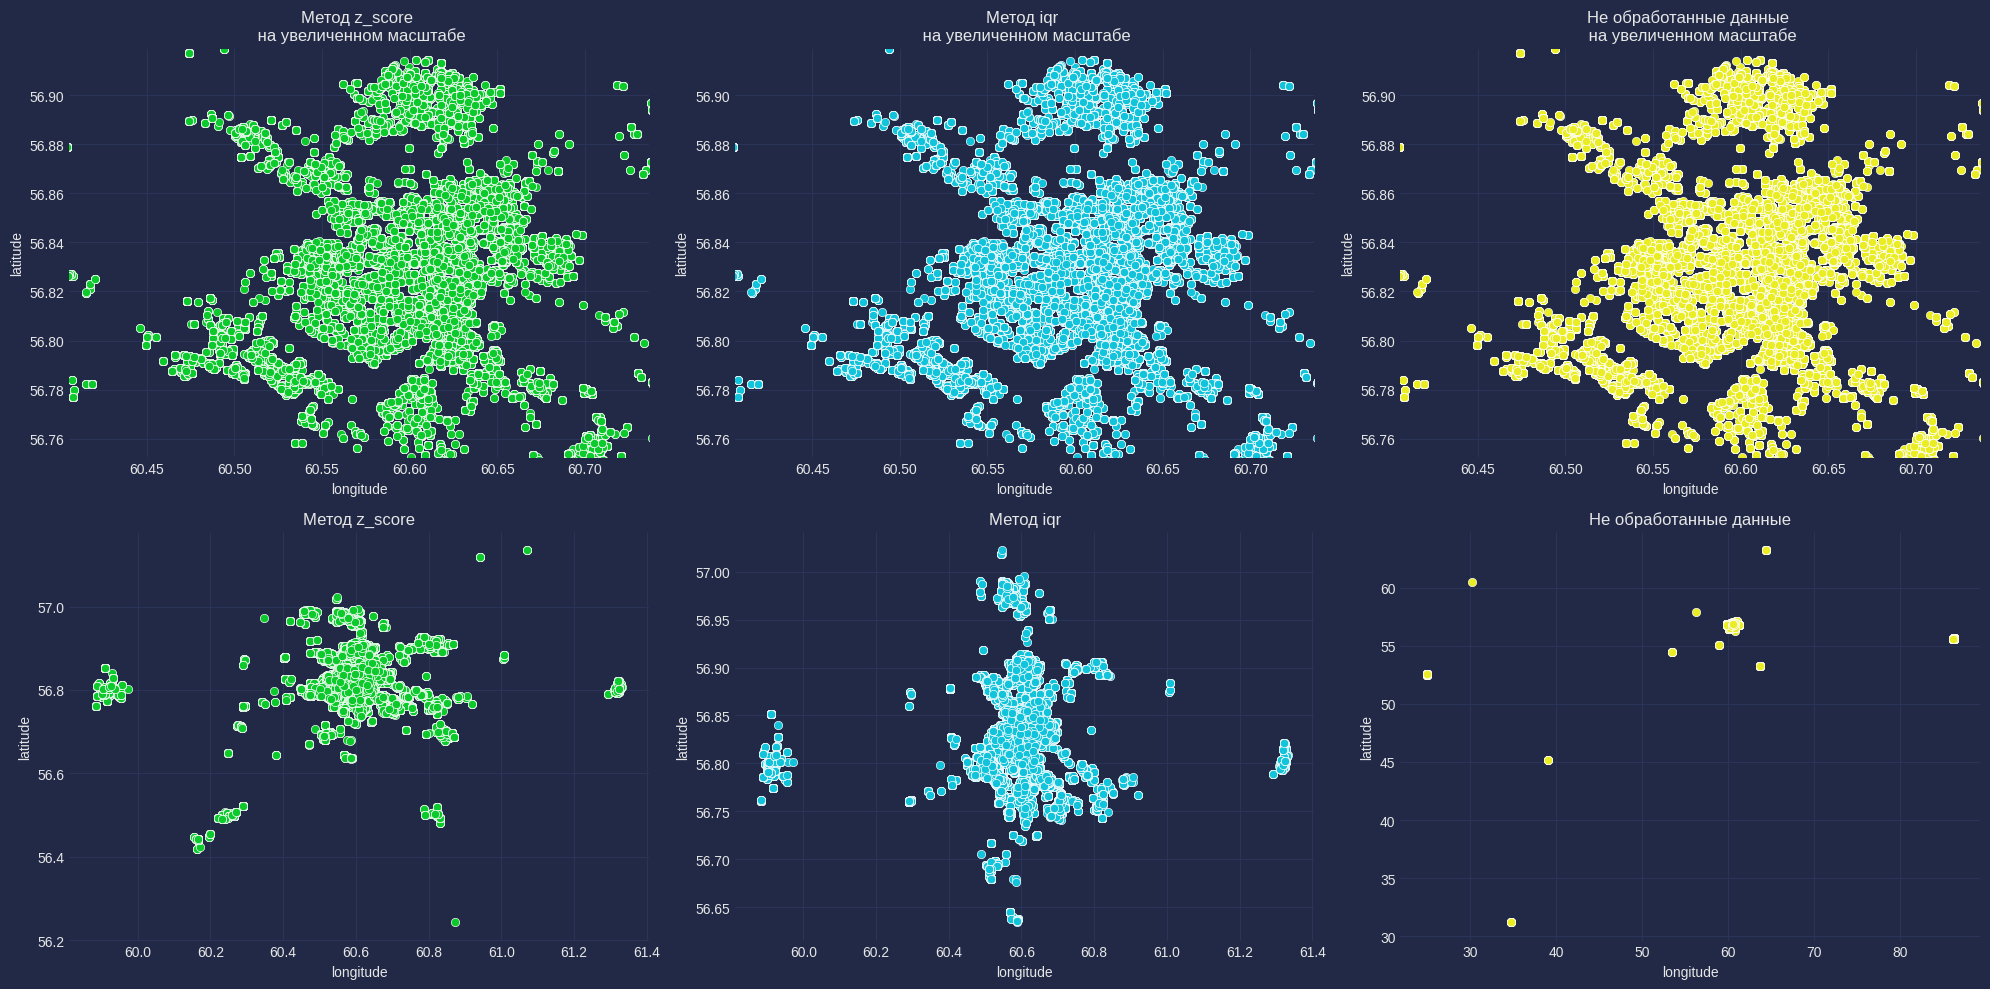

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Строим графики обоих методов и неочещенного датасэта на приближенном масштабе
scater_z_ekb = sns.scatterplot(
    x=z_df['longitude'],
    y=z_df['latitude'],
    color='#0cc92c',
    ax=axes[0][0]
    )
scater_z_ekb.set_ylim(56.752366, 56.919087)
scater_z_ekb.set_xlim(60.405890, 60.736505)

scater_iqr_ekb = sns.scatterplot(
    x=iqr_df['longitude'],
    y=iqr_df['latitude'],
    color='#12c4db',
    ax=axes[0][1]
    )
scater_iqr_ekb.set_ylim(56.752366, 56.919087)
scater_iqr_ekb.set_xlim(60.405890, 60.736505)


scater_full_ekb = sns.scatterplot(
    x=df['longitude'],
    y=df['latitude'],
    color='#eaed24',
    ax=axes[0][2]
    )
scater_full_ekb.set_ylim(56.752366, 56.919087)
scater_full_ekb.set_xlim(60.405890, 60.736505)

scater_z_ekb.set(title='Метод z_score \n на увеличенном масштабе')
scater_iqr_ekb.set(title='Метод iqr \n на увеличенном масштабе')
scater_full_ekb.set(title='Не обработанные данные \n на увеличенном масштабе')

#----------------------------------------
# Строим графики обоих методов и неочещенного датасэта на автоматическом масштабе
scater_z = sns.scatterplot(
    x=z_df['longitude'],
    y=z_df['latitude'],
    color='#0cc92c',
    ax=axes[1][0]
    )
scater_iqr = sns.scatterplot(
    x=iqr_df['longitude'],
    y=iqr_df['latitude'],
    color='#12c4db',
    ax=axes[1][1]
    )
scater_full = sns.scatterplot(
    x=df['longitude'],
    y=df['latitude'],
    color='#eaed24',
    ax=axes[1][2]
    )

scater_z.set(title='Метод z_score')
scater_iqr.set(title='Метод iqr')
scater_full.set(title='Не обработанные данные')
plt.tight_layout();

**По этим графикам можно сделать несколько выводов.**

1. Метод iqr cработал плохо, удалив нужные адреса в пределах города
2. Метод z_score при step=1 сработал неплохо, но при увеличенном масштабе(в границах города) такой же результат показал и неочищенный датасэт.

**Думаю, что достаточно обойтись границами города и прилижаших ему городов для удаления выбросов.**

In [50]:
ylim= tuple([56.752366, 56.919087])
xlim = tuple([60.405890, 60.736505])
clean_df = df[
            (df['latitude'] >= ylim[0]) &\
            (df['latitude'] <= ylim[1]) &\
            (df['longitude'] >= xlim[0]) &\
            (df['longitude'] <= xlim[1])
            ]
clean_df.shape

(147374, 20)

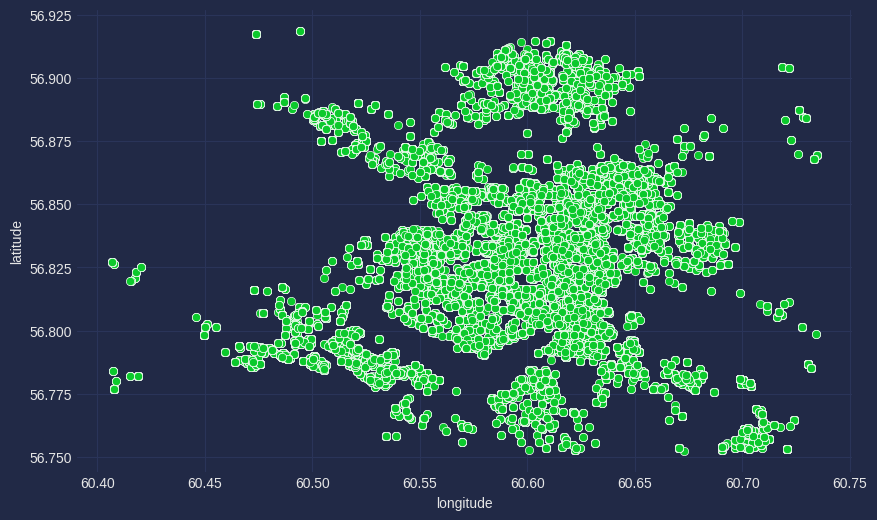

In [51]:
fig = plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=clean_df['longitude'], y=clean_df['latitude'], color='#0cc92c')

In [52]:
# сохраним данну таблицу для работы с кластеризацией
clean_df.to_csv('support/clust_data.csv', index=False)